In [1]:
%pip install tensorboard pandas
%pip install matplotlib seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Home

In [2]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [3]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.3.0


In [69]:
experiment_id = "l7RyaOkxRxC7TxzJZDIOEA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
experiment

In [42]:
print('Runs', df["run"].unique())
print('Tags', df["tag"].unique())

Runs ['BipedalWalker/Baseline-15skills-seed0'
 'BipedalWalker/Baseline-15skills-seed1'
 'BipedalWalker/Baseline-15skills-seed2' 'BipedalWalker/Diverse1-1k-seed0'
 'BipedalWalker/Diverse1-1k-seed1' 'BipedalWalker/Diverse1-1k-seed2'
 'BipedalWalker/Diverse1-2k-seed0'
 'BipedalWalker/Diverse2-0.05thresh-1k-seed0'
 'BipedalWalker/Diverse2-0.05thresh-1k-seed1'
 'BipedalWalker/Diverse2-0.05thresh-1k-seed2'
 'BipedalWalker/Naive-1k-seed0' 'BipedalWalker/Naive-1k-seed1'
 'BipedalWalker/Naive-1k-seed2' 'BipedalWalker/Reward-1k-seed0'
 'BipedalWalker/Reward-1k-seed1' 'BipedalWalker/Reward-1k-seed2'
 'Hopper/2022-04-09-15-36-32' 'Hopper/2022-04-09-15-36-45'
 'Hopper/2022-04-09-15-37-19' 'Hopper/2022-04-09-15-37-55'
 'Hopper/2022-04-09-15-38-13' 'Hopper/2022-04-09-15-40-37'
 'Hopper/2022-04-17-23-40-10' 'Hopper/2022-04-17-23-48-15'
 'Hopper/2022-04-18-00-20-05' 'Hopper/2022-04-18-00-25-51'
 'Hopper/2022-04-18-00-28-18' 'Hopper/2022-04-18-00-39-31'
 'Hopper/2022-04-18-00-52-49' 'Hopper/2022-04-18-0

In [53]:
df_Hopper = df[df.run.str.startswith("Hopper/Diverse2")]
df_Hopper

,run,tag,step,value
90492,Hopper/Diverse2-0.05thresh-1k-seed0,Cumulative runtime,1,3.473391
90493,Hopper/Diverse2-0.05thresh-1k-seed0,Cumulative runtime,2,3.497717
90494,Hopper/Diverse2-0.05thresh-1k-seed0,Cumulative runtime,3,3.516977
90495,Hopper/Diverse2-0.05thresh-1k-seed0,Cumulative runtime,4,3.536865
90496,Hopper/Diverse2-0.05thresh-1k-seed0,Cumulative runtime,5,3.558554
...,...,...,...,...
97687,Hopper/Diverse2-0.05thresh-1k-seed2,Running logq(z|s),296,-0.155890
97688,Hopper/Diverse2-0.05thresh-1k-seed2,Running logq(z|s),297,-0.155691
97689,Hopper/Diverse2-0.05thresh-1k-seed2,Running logq(z|s),298,-0.155545
97690,Hopper/Diverse2-0.05thresh-1k-seed2,Running logq(z|s),299,-0.155395


In [54]:
df_Hopper.to_csv('Hopper_diverse2.csv')

In [50]:
print('Runs', df_Hopper["run"].unique())
print('Tags', df_Hopper["tag"].unique())
runs = df_Hopper.run.apply(lambda run: run.split("/")[1])
runs

Runs ['Hopper/Diverse1-0.7thresh-10w-1k-seed0'
 'Hopper/Diverse1-0.7thresh-10w-1k-seed1'
 'Hopper/Diverse1-0.7thresh-10w-1k-seed2'
 'Hopper/Diverse1-0.7thresh-10w-2k-seed0'
 'Hopper/Diverse1-0.7thresh-10w-2k-seed1'
 'Hopper/Diverse1-0.7thresh-10w-2k-seed2'
 'Hopper/Diverse1-0.7thresh-10window-1incre'
 'Hopper/Diverse1-0.7thresh-10window-2incre']
Tags ['Cumulative runtime' 'Diverse1 episode diversity reward'
 'Episode Diverse2 total' 'Episode duration' 'Episode reward'
 'Max episode reward' 'Number of skills' 'Running logq(z|s)']


71292       Diverse1-0.7thresh-10w-1k-seed0
71293       Diverse1-0.7thresh-10w-1k-seed0
71294       Diverse1-0.7thresh-10w-1k-seed0
71295       Diverse1-0.7thresh-10w-1k-seed0
71296       Diverse1-0.7thresh-10w-1k-seed0
                        ...                
90487    Diverse1-0.7thresh-10window-2incre
90488    Diverse1-0.7thresh-10window-2incre
90489    Diverse1-0.7thresh-10window-2incre
90490    Diverse1-0.7thresh-10window-2incre
90491    Diverse1-0.7thresh-10window-2incre
Name: run, Length: 19200, dtype: object

In [55]:
# plt.figure(figsize=(16, 6))
# sns.lineplot(data=df_Hopper, x="step", y="Max episode reward",
#              hue=runs).set_title("Max episode reward")

In [64]:
agg_df = pd.read_csv('Hopper_results.csv')
print(agg_df.columns)
agg_df = agg_df[['step', 'base-maxreward', 'naive-maxreward', 'envinformed-maxreward',
       'diverse1-maxreward', 'diverse2-maxreward']]
agg_df

Index(['step', 'base-maxreward', 'naive-maxreward', 'envinformed-maxreward',
       'diverse1-maxreward', 'diverse2-maxreward', 'base-logq', 'naive-logq',
       'envinformed-logq', 'diverse1-logq', 'diverse2-logq', 'base-numskills',
       'naive-numskills', 'envinformed-numskills', 'diverse1-numskills',
       'diverse2-numskills'],
      dtype='object')


,step,base-maxreward,naive-maxreward,envinformed-maxreward,diverse1-maxreward,diverse2-maxreward
0,1,9.415097,10.791071,9.090001,9.090001,4.215712
1,2,12.927636,12.274449,10.074302,10.074302,6.599809
2,3,12.927636,12.274449,10.074302,10.074302,37.174698
3,4,12.927636,12.274449,10.074302,10.074302,37.558756
4,5,12.927636,12.274449,10.074302,10.074302,37.558756
...,...,...,...,...,...,...
295,296,1056.060810,1131.836343,1078.558717,1088.004393,1044.105407
296,297,1056.060810,1131.836343,1078.558717,1088.004393,1233.584657
297,298,1056.060810,1131.836343,1078.558717,1088.004393,1233.584657
298,299,1079.342103,1131.836343,1078.558717,1088.004393,1233.584657


Text(0.5, 1.0, 'Max episode reward')

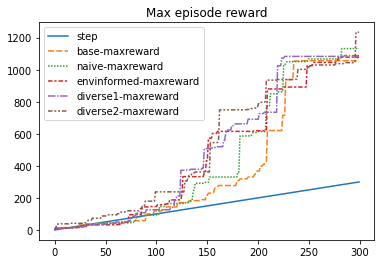

In [66]:
sns.lineplot(data=agg_df).set_title("Max episode reward")